In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 🔹 1️⃣ GitHub에서 CSV 파일 다운로드 및 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv"
response = requests.get(url).text
df = pd.read_csv(StringIO(response))

display(df)

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
df.isnull().sum() # 결측치 확인

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [3]:
print("-------------------------")
df['Sex'].value_counts() # Sex 확인

-------------------------


Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [4]:
# Rings 예측에 필요 없는 컬럼 제거
df.drop(columns=["id"], inplace=True)

In [5]:
# 2️⃣ 모든 문자형 컬럼을 Label Encoding
label_encoders = {}  # 각 컬럼별 인코더 저장
for col in df.select_dtypes(include=["object"]).columns:  # 문자열(범주형) 데이터만 선택
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # 문자열을 숫자로 변환
    label_encoders[col] = le  # 변환기 저장 (나중에 역변환할 때 사용 가능)
display(df)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
print("-------------------------")
df['Sex'].value_counts() # Sex 확인

-------------------------


Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

In [7]:
df['Rings'].value_counts() # 레이블 확인

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

In [8]:
# 🔹 4️⃣ 특징(X)과 레이블(y) 분리
X = df.drop(columns=["Rings"])  # 예측 대상 "Rings" 제외
y = df["Rings"]  # 예측할 타겟

In [9]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [10]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [19]:

# 🔹 5️⃣ 데이터 표준화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X의 값들을 정규화

In [12]:
# 🔹 6️⃣ 훈련/테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)



📌 Decision Tree Regressor 모델 성능:
Mean Squared Error (MSE): 9.8194
R² Score: 0.0929


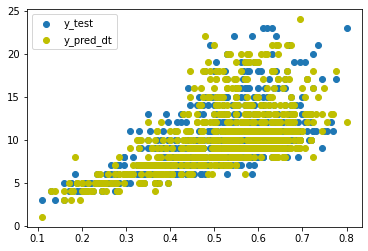

In [20]:
# 1. Decision Tree Regressor
# 모델 생성
dt_model = DecisionTreeRegressor(random_state=42)

# 모델 학습
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# 결과 출력
print("\n📌 Decision Tree Regressor 모델 성능:")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

# Rings와 관련성이 높다 생각한 Length 컬럼으로 산점도 그리기
plt.scatter(X_test["Length"], y_test, label='y_test')  # 첫 번째 컬럼 선택
plt.scatter(X_test["Length"], y_pred_dt, c='y', label='y_pred_dt')
plt.legend()
plt.show()


📌 Random Forest Regressor 모델 성능:
Mean Squared Error (MSE): 5.0915
R² Score: 0.5297


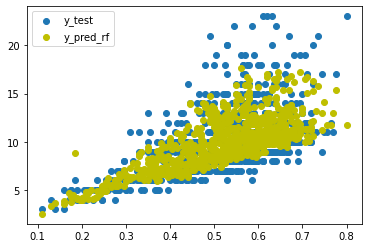

In [21]:
# 2. Random Forest Regressor
# 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 결과 출력
print("\n📌 Random Forest Regressor 모델 성능:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Rings와 관련성이 높다 생각한 Length 컬럼으로 산점도 그리기
plt.scatter(X_test["Length"], y_test, label='y_test')  # 첫 번째 컬럼 선택
plt.scatter(X_test["Length"], y_pred_rf, c='y', label='y_pred_rf')
plt.legend()
plt.show()


📌 Support Vector Regressor 모델 성능:
Mean Squared Error (MSE): 5.3086
R² Score: 0.5096


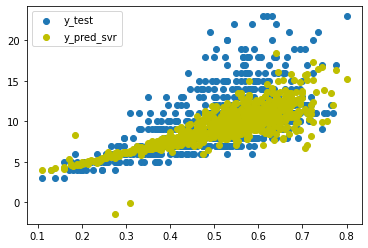

In [22]:
# 3. SVR
# 모델 생성
svr_model = SVR(kernel='linear', C=10, gamma=0.1)

# 모델 학습
svr_model.fit(X_train, y_train)

# 예측
y_pred_svr = svr_model.predict(X_test)

# 평가
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# 결과 출력
print("\n📌 Support Vector Regressor 모델 성능:")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")

# Rings와 관련성이 높다 생각한 Length 컬럼으로 산점도 그리기
plt.scatter(X_test["Length"], y_test, label='y_test')  # 첫 번째 컬럼 선택
plt.scatter(X_test["Length"], y_pred_svr, c='y', label='y_pred_svr')
plt.legend()
plt.show()

📌 Linear Regression 모델 성능:
Mean Squared Error (MSE): 5.0625
R² Score: 0.5323


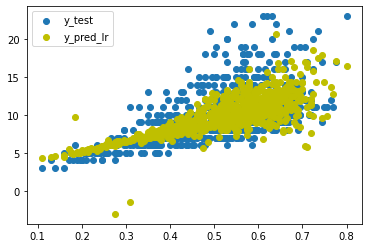

In [18]:
# 4. Lienear Regression
# 모델 생성
lr_model = LinearRegression()

# 모델 학습
lr_model.fit(X_train, y_train)

# 예측
y_pred_lr = lr_model.predict(X_test)

# 평가
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 결과 출력
print("📌 Linear Regression 모델 성능:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Rings와 관련성이 높다 생각한 Length 컬럼으로 산점도 그리기
plt.scatter(X_test["Length"], y_test, label='y_test')  # 첫 번째 컬럼 선택
plt.scatter(X_test["Length"], y_pred_lr, c='y', label='y_pred_lr')
plt.legend()
plt.show()